<a href="https://colab.research.google.com/github/akshayjain3450/Semester7/blob/master/Deep%20Learning/Assignments/CNN_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries Required

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import time
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import numpy as np

Processor (GPU or CPU), change runtime on colab for GPU

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [8]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=0.1,std=0.3)])

train_set = torchvision.datasets.MNIST(root = "../data",train=True,download=True,transform=transform)
test_set = torchvision.datasets.MNIST(root ="../data",train=False,download=True,transform=transform)

train_loader = torch.utils.data.DataLoader(train_set,batch_size=60,shuffle=True,num_workers=0)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=60,shuffle=True,num_workers=0)

In [9]:
data_train = enumerate(train_loader)
batch_id , (images,labels) = next(data_train)

In [10]:
images.shape

torch.Size([60, 1, 28, 28])

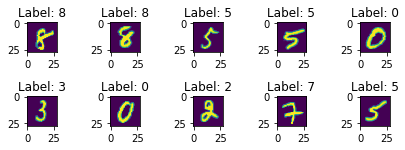

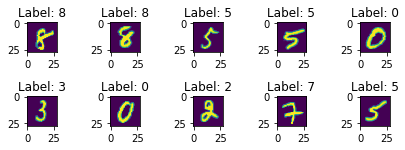

In [11]:
figure = plt.figure()
for i in range(0,10):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0])
  plt.title("Label: {}".format(labels[i]))
figure

In [12]:
class Net(nn.Module):
    def __init__(self,num_classes=10):
        super(Net,self).__init__()

        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)

        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # Instantiate a fully connected layer
        self.fc1 = nn.Linear(7 * 7 * 10, 100)
        self.fc2 = nn.Linear(100,num_classes)
    
    def forward(self,x):
        # Apply conv followd by relu, then in next line pool
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followd by relu, then in next line pool
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.view(-1, 7*7*10)
        x = self.fc1(x)

        # Apply the fully connected layer and return the result
        return self.fc2(x)

# To calculate output size use formula (W - K + 2P/S) + 1
# image dimension is 28 * 28 * 1
# W = 28 , K = 3 , P = 1 , S = 1
# after con1 , output size is 28*28*5
# after first maxpool, output size is 14*14*5
# after conv2, output size is 14*14*10
# after second maxpool , output size is 7*7*10

# NOTE : For maxpool use same formula, just replace kernel with maxpool size

In [13]:
model = Net()
model.to(device) # transfer to GPU if available
optimizer = torch.optim.Adam(model.parameters(),lr=0.1)
calculate_loss = nn.CrossEntropyLoss()

num_epochs = 100

since = time.time()

gradient_vector = []
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    print('-' * 10)
    #scheduler.step()
    model.train()
    running_loss = 0.0
    tk0 = tqdm(train_loader, total=int(len(train_loader)))
    counter = 0



    # Training Code start 
    for batch_idx, data_set in enumerate(tk0):

        optimizer.zero_grad()  # Clear the old gradients from last step  
        data , labels = data_set
        data = data.to(device)
        labels = labels.to(device)
        output = model(data)   #forward
        output.to(device)
        loss = calculate_loss(output,labels) #calculate loss
        loss.backward()
        optimizer.step()

        # Training code ends



        running_loss += loss.item() * data.size(0)
        counter += 1
        tk0.set_postfix(loss=(running_loss / (counter * train_loader.batch_size)))
    
    #Gradients
    g_2 = []
    for name, param in model.named_parameters():
        if param.requires_grad and "bias" not in name:
            #print (name, param.grad.data)
            g_2.append(torch.flatten(param.grad.data))
    print(torch.norm(torch.cat([g_2[0],g_2[1],g_2[2],g_2[3]],dim=0)))
    gradient_vector.append(torch.norm(torch.cat([g_2[0],g_2[1],g_2[2],g_2[3]],dim=0)).item())

    
    # #weights
    # for name, param in model.named_parameters():
    #     if param.requires_grad:
    #         print (name, param.data)
    

time_elapsed = time.time() - since
print('\nTraining completed in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))


Epoch 0/99
----------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



tensor(0.0507, device='cuda:0')
Epoch 1/99
----------



tensor(0.0683, device='cuda:0')
Epoch 2/99
----------



tensor(0.0505, device='cuda:0')
Epoch 3/99
----------



tensor(0.0392, device='cuda:0')
Epoch 4/99
----------



tensor(0.0386, device='cuda:0')
Epoch 5/99
----------



tensor(0.0797, device='cuda:0')
Epoch 6/99
----------



tensor(0.1640, device='cuda:0')
Epoch 7/99
----------



tensor(0.0354, device='cuda:0')
Epoch 8/99
----------



tensor(0.0538, device='cuda:0')
Epoch 9/99
----------



tensor(0.0544, device='cuda:0')
Epoch 10/99
----------



tensor(0.0485, device='cuda:0')
Epoch 11/99
----------



tensor(0.0621, device='cuda:0')
Epoch 12/99
----------



tensor(0.0430, device='cuda:0')
Epoch 13/99
----------



tensor(0.0881, device='cuda:0')
Epoch 14/99
----------



tensor(0.0244, device='cuda:0')
Epoch 15/99
----------



tensor(0.0626, device='cuda:0')
Epoch 16/99
----------



tensor(0.0526, device='cuda:0')
Epoch 17/99
----------



tensor(0.0769, device='cuda:0')
Epoch 18/99
----------



tensor(0.0628, device='cuda:0')
Epoch 19/99
----------



tensor(0.0761, device='cuda:0')
Epoch 20/99
----------



tensor(0.0474, device='cuda:0')
Epoch 21/99
----------



tensor(0.0466, device='cuda:0')
Epoch 22/99
----------



tensor(0.0916, device='cuda:0')
Epoch 23/99
----------



tensor(0.0531, device='cuda:0')
Epoch 24/99
----------



tensor(0.0575, device='cuda:0')
Epoch 25/99
----------



tensor(0.1124, device='cuda:0')
Epoch 26/99
----------



tensor(0.0392, device='cuda:0')
Epoch 27/99
----------



tensor(0.0563, device='cuda:0')
Epoch 28/99
----------



tensor(0.0443, device='cuda:0')
Epoch 29/99
----------



tensor(0.0996, device='cuda:0')
Epoch 30/99
----------



tensor(0.0661, device='cuda:0')
Epoch 31/99
----------



tensor(0.1010, device='cuda:0')
Epoch 32/99
----------



tensor(0.0250, device='cuda:0')
Epoch 33/99
----------



tensor(0.0454, device='cuda:0')
Epoch 34/99
----------



tensor(0.0522, device='cuda:0')
Epoch 35/99
----------



tensor(0.0608, device='cuda:0')
Epoch 36/99
----------



tensor(0.0468, device='cuda:0')
Epoch 37/99
----------



tensor(0.0566, device='cuda:0')
Epoch 38/99
----------



tensor(0.0593, device='cuda:0')
Epoch 39/99
----------



tensor(0.0781, device='cuda:0')
Epoch 40/99
----------



tensor(0.0484, device='cuda:0')
Epoch 41/99
----------



tensor(0.0886, device='cuda:0')
Epoch 42/99
----------



tensor(0.0553, device='cuda:0')
Epoch 43/99
----------



tensor(0.0649, device='cuda:0')
Epoch 44/99
----------



tensor(0.0663, device='cuda:0')
Epoch 45/99
----------



tensor(0.0466, device='cuda:0')
Epoch 46/99
----------



tensor(0.0522, device='cuda:0')
Epoch 47/99
----------



tensor(0.0760, device='cuda:0')
Epoch 48/99
----------



tensor(0.0739, device='cuda:0')
Epoch 49/99
----------



tensor(0.0657, device='cuda:0')
Epoch 50/99
----------



tensor(0.1149, device='cuda:0')
Epoch 51/99
----------



tensor(0.0726, device='cuda:0')
Epoch 52/99
----------



tensor(0.0280, device='cuda:0')
Epoch 53/99
----------



tensor(0.0785, device='cuda:0')
Epoch 54/99
----------



tensor(0.0628, device='cuda:0')
Epoch 55/99
----------



tensor(0.0759, device='cuda:0')
Epoch 56/99
----------



tensor(0.0741, device='cuda:0')
Epoch 57/99
----------



tensor(0.0895, device='cuda:0')
Epoch 58/99
----------



tensor(0.0943, device='cuda:0')
Epoch 59/99
----------



tensor(0.0433, device='cuda:0')
Epoch 60/99
----------



tensor(0.0330, device='cuda:0')
Epoch 61/99
----------



tensor(0.0540, device='cuda:0')
Epoch 62/99
----------



tensor(0.0528, device='cuda:0')
Epoch 63/99
----------



tensor(0.0694, device='cuda:0')
Epoch 64/99
----------



tensor(0.0387, device='cuda:0')
Epoch 65/99
----------



tensor(0.0919, device='cuda:0')
Epoch 66/99
----------



tensor(0.0394, device='cuda:0')
Epoch 67/99
----------



tensor(0.0398, device='cuda:0')
Epoch 68/99
----------



tensor(0.1169, device='cuda:0')
Epoch 69/99
----------



tensor(0.0940, device='cuda:0')
Epoch 70/99
----------



tensor(0.0397, device='cuda:0')
Epoch 71/99
----------



tensor(0.1009, device='cuda:0')
Epoch 72/99
----------



tensor(0.0492, device='cuda:0')
Epoch 73/99
----------



tensor(0.0681, device='cuda:0')
Epoch 74/99
----------



tensor(0.0582, device='cuda:0')
Epoch 75/99
----------



tensor(0.0857, device='cuda:0')
Epoch 76/99
----------



tensor(0.1084, device='cuda:0')
Epoch 77/99
----------



tensor(0.0344, device='cuda:0')
Epoch 78/99
----------



tensor(0.0775, device='cuda:0')
Epoch 79/99
----------



tensor(0.0623, device='cuda:0')
Epoch 80/99
----------



tensor(0.0816, device='cuda:0')
Epoch 81/99
----------



tensor(0.0633, device='cuda:0')
Epoch 82/99
----------



tensor(0.0751, device='cuda:0')
Epoch 83/99
----------



tensor(0.0490, device='cuda:0')
Epoch 84/99
----------



tensor(0.0513, device='cuda:0')
Epoch 85/99
----------



tensor(0.0641, device='cuda:0')
Epoch 86/99
----------



tensor(0.0342, device='cuda:0')
Epoch 87/99
----------



tensor(0.0465, device='cuda:0')
Epoch 88/99
----------



tensor(0.0343, device='cuda:0')
Epoch 89/99
----------



tensor(0.0567, device='cuda:0')
Epoch 90/99
----------



tensor(0.0504, device='cuda:0')
Epoch 91/99
----------



tensor(0.1595, device='cuda:0')
Epoch 92/99
----------



tensor(0.0662, device='cuda:0')
Epoch 93/99
----------



tensor(0.0409, device='cuda:0')
Epoch 94/99
----------



tensor(0.0464, device='cuda:0')
Epoch 95/99
----------



tensor(0.0239, device='cuda:0')
Epoch 96/99
----------



tensor(0.0750, device='cuda:0')
Epoch 97/99
----------



tensor(0.1199, device='cuda:0')
Epoch 98/99
----------



tensor(0.0635, device='cuda:0')
Epoch 99/99
----------



tensor(0.0543, device='cuda:0')

Training completed in 33m 50s


In [14]:
correct, total = 0 , 0
predictions = []
model.eval()

for i, data_set in enumerate(test_loader):
  data, labels = data_set
  data, labels = data.to(device), labels.to(device)
  output = model(data)
  _, predicted = torch.max(output.data,1)
  predictions.append(output)
  total += labels.size(0)
  correct += (predicted == labels).sum().item()

print('The testing set accuracy of the network is: %f %%' % (100 * correct / (total/10)))

The testing set accuracy of the network is: 98.000000 %


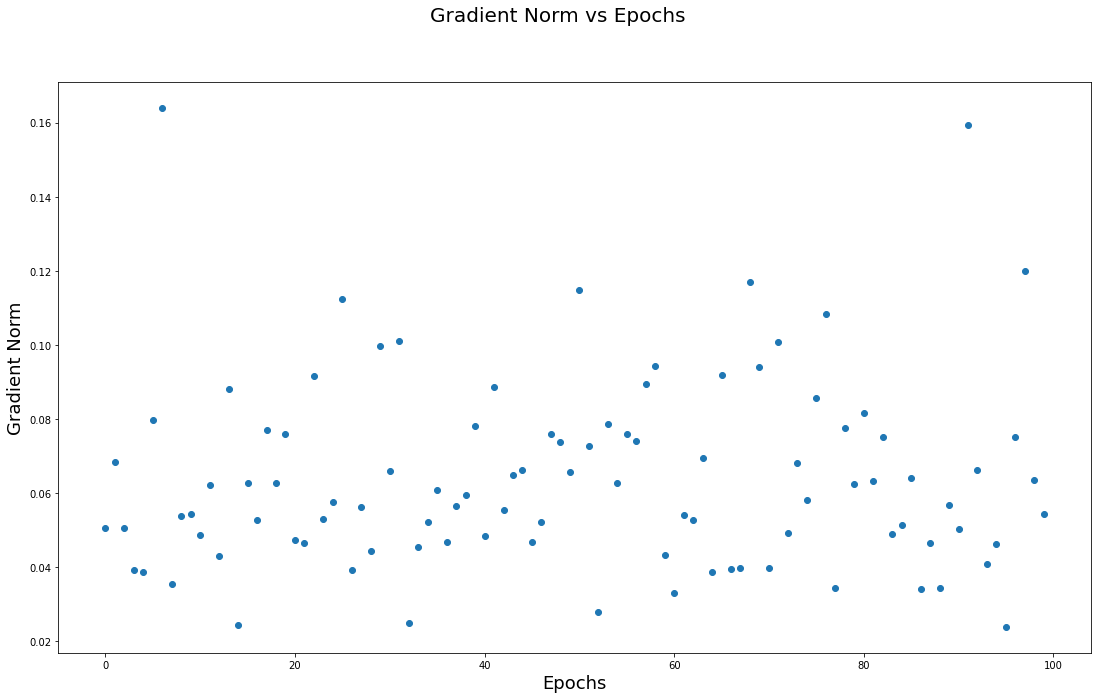

In [15]:
x = np.arange(len(gradient_vector))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Gradient Norm vs Epochs', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Gradient Norm', fontsize=18)
plt.scatter(x,gradient_vector)
plt.savefig('scatterplot_gradient norm vs epochs.pdf')